# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !rm -rf "/content/Animals-10"

In [2]:
### Guideline for convenience ###
# 압축 풀기

!unzip -qq "/content/drive/MyDrive/animals10.zip"

In [3]:
import os
import glob
import shutil
import random

In [4]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

# Aniamls-10폴더 안에 있는 폴더들의 이름이 클래쓰임으로 그 이름들을 가져와서 class_names에 넣는다.
class_names = os.listdir('/content/Animals-10')

# glob.glob로 파일 개수 확인
class_path = {} # 각 클래쓰별로 데이터들의 파일 경로를 저장
for each_class in class_names:
  class_path[each_class] = []
  for extension in ['jpg','jpeg','png']:
    class_path[each_class] += glob.glob(f'./Animals-10/{each_class}/*.{extension}') # * 임의의 파일이름

class_num = {} # 각 클래쓰별로 데이터의 개수를 저장
for each_class in class_names:
  class_num[each_class] = len(class_path[each_class])

In [5]:
# 클래쓰 이름별로 데이터수 확인

class_num

{'squirrel': 1862,
 'cat': 1668,
 'elephant': 1446,
 'spider': 4821,
 'horse': 2623,
 'butterfly': 2112,
 'chicken': 3098,
 'cow': 1866,
 'dog': 4863,
 'sheep': 1820}

In [6]:
# test에 넣을 이미지 개수 계산

# 10개의 클래쓰에 대한 데이터의 수가 다르다.
# 여기서 데이터수 선택과 관련하여 다음 2가지의 선택을 할 수 있는데, 나는 (2)를 하기로 했다.
# (1). 가장 작은 데이터수를 기준으로 동일한 갯수의 train, test 데이터를 갖도록 한다. <- 특정 데이터에 대한 과적합을 방지.
# (2). 데이터 수의 다름을 무시하고 전체데이터 중에 test가 차지하는 비중만을 같도록 해준다. <- 기존의 데이터를 다 사용하기 위함.

test_num = {} # 각 클래쓰별로 Test데이터 수를 저장
for each_class in class_names:
  test_num[each_class] = round(class_num[each_class]*0.3) # 대략 30%를 test로 분리할 것이다.

In [7]:
# test에 넣을 이미지 개수

test_num

{'squirrel': 559,
 'cat': 500,
 'elephant': 434,
 'spider': 1446,
 'horse': 787,
 'butterfly': 634,
 'chicken': 929,
 'cow': 560,
 'dog': 1459,
 'sheep': 546}

In [8]:
# train, test 폴더 경로 선언 & 만들기

for each_class in class_names:
  os.makedirs(f'./train/{each_class}', exist_ok=True)
  os.makedirs(f'./test/{each_class}', exist_ok=True)

In [9]:
# 데이터를 train, test로 나눠주는 함수 정의

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 복사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [10]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

for each_class in class_names:
  split(class_path[each_class], test_num[each_class], f'./train/{each_class}', f'./test/{each_class}')

train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546


In [11]:
# 잘 들어갔는지 확인

# train
for each_class in class_names:
  print(glob.glob(f'./train/{each_class}/*.jp*g')[-5:]) # jpg,jpeg만.. png는...

# test
print('-'*100, '\n')
for each_class in class_names:
  print(glob.glob(f'./test/{each_class}/*.jp*g')[-5:])

['./train/squirrel/squirrel (743).jpeg', './train/squirrel/squirrel (1844).jpeg', './train/squirrel/squirrel (565).jpeg', './train/squirrel/squirrel (474).jpeg', './train/squirrel/squirrel (264).jpeg']
['./train/cat/cat (220).jpeg', './train/cat/cat (941).jpeg', './train/cat/cat (1107).jpeg', './train/cat/cat (1068).jpeg', './train/cat/cat (51).jpeg']
['./train/elephant/elephant (163).jpeg', './train/elephant/elephant (762).jpeg', './train/elephant/elephant (508).jpeg', './train/elephant/elephant (274).jpg', './train/elephant/elephant (63).jpeg']
['./train/spider/spider (1560).jpeg', './train/spider/spider (1762).jpeg', './train/spider/spider (212).jpg', './train/spider/spider (489).jpeg', './train/spider/spider (3431).jpeg']
['./train/horse/horse (1443).jpeg', './train/horse/horse (895).jpeg', './train/horse/horse (571).jpeg', './train/horse/horse (816).jpeg', './train/horse/horse (725).jpeg']
['./train/butterfly/butterfly (732).jpeg', './train/butterfly/butterfly (144).jpg', './train

# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop, CenterCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
from torchsummary import summary


## 1. 데이터 살펴보기

In [13]:
# 모두 칼라데이터인지 확인
count = 0
count1 = 0
for types in ['train','test']:
  for each_class in class_names:
    picture_idx = os.listdir(f'/content/{types}/{each_class}')
    for index in picture_idx:
      path = f'{types}/{each_class}/{index}'
      trial_img = Image.open(path)

      # H,W,C에서 C가 1 혹은 3인지 확인  
      if np.array(trial_img).shape[-1] != 3:
        count += 1
      if np.array(trial_img).shape[-1] == 3:
        count1 += 1
print('rgb가 아닌 사진의 수 : {}개'.format(count))
print('rgb로 이루어진 사진의 수 : {}개'.format(count1))
print('전체 사진 수 : {}개'.format(np.array(list(class_num.values())).sum()))

rgb가 아닌 사진의 수 : 51개
rgb로 이루어진 사진의 수 : 26128개
전체 사진 수 : 26179개


In [14]:
# input 데이터의 사이즈(차원)에 대해 확인해보자.

# 차원분포에 대해 확인
picture_size = {'Height':[], 'Width':[]}
for types in ['train','test']:
  for each_class in class_names:
    picture_idx = os.listdir(f'/content/{types}/{each_class}')
    for index in picture_idx:
      path = f'{types}/{each_class}/{index}'
      trial_img = Image.open(path)

      picture_size['Height'].append(np.array(trial_img).shape[0]) # H,W,C의 0번쨰 index 
      picture_size['Width'].append(np.array(trial_img).shape[1]) # H,W,C의 1번째 index

picture_size_df = pd.DataFrame(picture_size)
picture_size_df.value_counts()

Height  Width
225     300      4397
200     300      3281
300     300      1192
169     300      1048
426     640       694
                 ... 
190     265         1
192     240         1
        262         1
194     179         1
6000    3798        1
Length: 1002, dtype: int64

252.63016157989227

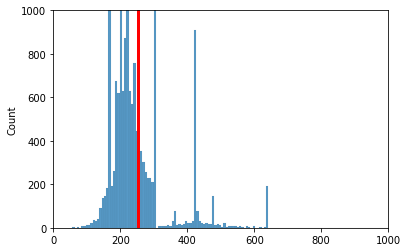

In [15]:
sns.histplot(picture_size['Height'])
plt.xlim(0,1000)
plt.ylim(0,1000)
plt.axvline(x=np.array(picture_size['Height']).mean(), color='r', linewidth=3)
np.array(picture_size['Height']).mean()

# 대부분 평균인 252근처의 'Height'를 가진다.

320.0388097329921

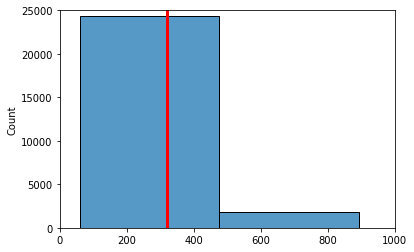

In [16]:
sns.histplot(picture_size['Width'])
plt.xlim(0,1000)
plt.ylim(0,25000)
plt.axvline(x=np.array(picture_size['Width']).mean(), color='r', linewidth=3)
np.array(picture_size['Width']).mean()

# 대부분 50~450 근방의 넓은 범위에 걸쳐 'Width'를 가진다.

정리해보면, 다음과 같다.
1. 대부분 평균인 252근처의 'Height'를 가진다.
2. 대부분 50~450 근방의 넓은 범위에 걸쳐 'Width'를 가진다.
3. 
그리고 우리는 모든 train data를 '(1) 동일하게' & '(2) 적당한 사이즈'로 만들어주어야한다.

(2) 적당한 사이즈란?
* 너무 크면, 데이터를 학습시키는데에 시간이 오래 들고 데이터도 조금 변형된다.
* 너무 작으면, 데이터의 일부가 손실된다.
기존에 CIFAR10으로 진행했던 크기는 32x32였다. 고래사진의 경우에는 224x224였다.
따라서 데이터의 손실을 최소화하기 위해 대부분의 데이터가 갖는 크기로 resize를 해주자. 정사각형의 데이터를 만들기 위해 252를 사용한다. ***즉, 252x252***
그리고 데이터가 예를 들어 나비이면, 나비가 이미지데이터 전체에 있지 않음으로
적당히 잘라주어야하는데 그 크기를 정하는 것은 '노가다'로 했다.


## 2. 데이터 가공을 위한 단계

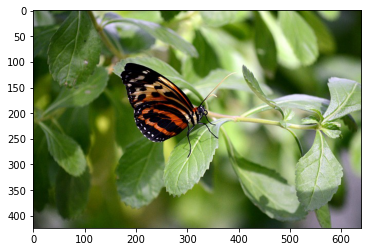

In [17]:
# 'crop-size'를 찾기위한 노가다 진행
picture_idx = os.listdir('/content/test/butterfly')

path = f'/content/test/butterfly/{picture_idx[0]}'
trial_img1 = Image.open(path)
imshow(trial_img1)

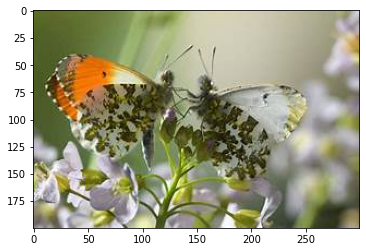

In [18]:
path = f'/content/test/butterfly/{picture_idx[1]}'
trial_img2 = Image.open(path)
imshow(trial_img2)

In [19]:
trial_func = transforms.Compose([
    transforms.Resize(252), # 새로 정한 사이즈로 사이즈 변경진행
    transforms.CenterCrop(224) # 224x224로 자르면 얼추 되는 것 같다.
])

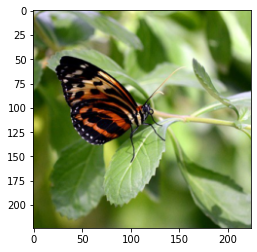

In [20]:
imshow(trial_func(trial_img1))

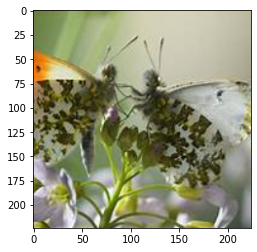

In [21]:
imshow(trial_func(trial_img2))

In [22]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!

transform_animals_train = transforms.Compose([

    transforms.Resize(252), # 새로 정한 사이즈로 사이즈 변경진행
    transforms.CenterCrop(224), # 224x224로 자르면 얼추 되는 것 같다.

    transforms.ColorJitter(brightness=0.5), # Augmentation
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    


    transforms.ToTensor(), # Tensor로 변환
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) # Normalize
    # mean, std를 직접 계산하기 위해서는 시간이 오래 걸림으로
    # 다른 데이터셋의 잘 알려진 평균과 표준편차값을 사용한다.
])

transform_animals_test = transforms.Compose([
    transforms.Resize(252),
    transforms.CenterCrop(224),

    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [23]:
# 변환 후의 데이터를 이미지 형태로 확인하기 위한 함수선언

def imshow_loader(img):
    img = img * 0.225 + 0.456 # 정확한 값은 아니지만 대강 normalize 반대로
    img_np = np.array(img) # numpy로 변환. 그러나 C,H,W 순이다.
    imshow(np.transpose(img_np, (1,2,0))) # H,W,C 으로 바꿔준다.
    plt.show()

## 3. Dataset 객체 선언
* len, getitem 등 데이터와 관련된 함수와 더불어
* train, test분리 및 가공과정이 들어간다.

In [24]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

train_data = torchvision.datasets.ImageFolder(
    root = './train', # 바로 train 폴더 지정
    transform = transform_animals_train
)
test_data = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_animals_test
)

Dataset이 잘 선언되었는지 확인

In [25]:
print('train data 수 :', len(train_data))
print('test data 수 :', len(test_data))

train data 수 : 18325
test data 수 : 7854


In [26]:
print('train data 차원 :', train_data[0][0].shape) # train만 변경함
print('test data 차원 :', test_data[0][0].shape) # test는 사이즈 변경안함 -> 다시 변경함

train data 차원 : torch.Size([3, 224, 224])
test data 차원 : torch.Size([3, 224, 224])


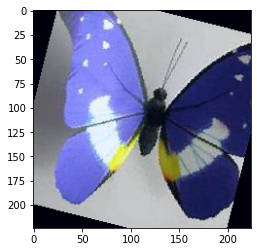

In [27]:
imshow_loader(train_data[0][0])

In [ ]:
# 레이블도 0~9까지 잘 있는데...(좀 오래 걸린다.)

label_list = []
for i in range(len(train_data)):
    label_list.append(train_data[i][1])
label_set = set(label_list)
label_set

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

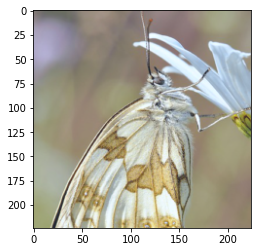

In [28]:
imshow_loader(test_data[0][0])

## 4. DataLoader 정의
* 앞서 정의한 Dataset 객체를 batch(학습단위)로 쪼개어 연속적을 접근할 수 있도록 한다.

In [29]:
# train, test에 대해 DataLoader 정의

trainloader_animals = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=True,         # train dataloader는 epoch마다 데이터 다시 섞어서 batch 만들고 학습! - 학습 효율 up
    num_workers=2
)

testloader_animals = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,      # 일반적으로 batch size = 16, 32
    shuffle=False,        # test dataloader는 데이터 매번 섞을 이유가 없음 - 어차피 확인 용도
    num_workers=2
)

DataLoader가 잘 선언되었는지 확인

In [30]:
print('Train입장')
print('Dataloader를 사용한 batch의 갯수 :',len(trainloader_animals))
print('직접 계산 :', len(train_data)/32)
print('-'*100)
print('Test입장')
print('Dataloader를 사용한 batch의 갯수 :',len(testloader_animals))
print('직접 계산 :', len(test_data)/32)

Train입장
Dataloader를 사용한 batch의 갯수 : 573
직접 계산 : 572.65625
----------------------------------------------------------------------------------------------------
Test입장
Dataloader를 사용한 batch의 갯수 : 246
직접 계산 : 245.4375


In [31]:
# dataloader의 iteration 하나만 가져와서 확인해보자

dataiter = iter(trainloader_animals)
images, labels = dataiter.next()

In [32]:
images.shape # 32개 batch_size(한 batch안의 이미지 갯수), Channel, Height, Weight

torch.Size([32, 3, 224, 224])

In [33]:
labels.shape # 32개 label <- 32개의 img에 해당하는 class값

torch.Size([32])

In [34]:
class_names

['squirrel',
 'cat',
 'elephant',
 'spider',
 'horse',
 'butterfly',
 'chicken',
 'cow',
 'dog',
 'sheep']

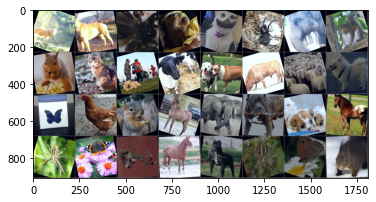

spider horse dog sheep cat dog butterfly sheep sheep cat horse cow horse spider cow horse squirrel elephant sheep chicken butterfly horse horse chicken dog squirrel dog chicken horse dog squirrel sheep


In [35]:
imshow_loader(torchvision.utils.make_grid(images))
print(' '.join(f'{class_names[labels[j]]:1s}' for j in range(32)))

## 5. Model 클래스 정의

In [52]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

#### 모델 정의 시 유념해야할 건 각 층의 결과물의 차원!
#### 모델이 복잡해지면 복잡해질수록 이는 더욱 중요해지므로 레이어별로 도출되는 데이터의 크기를 써넣는 것을 추천 (안맞으면 에러남)
# (해당 모델은 임의로 만든 모델로 성능을 보장하지 X)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        ##### Layer 정의 #####
        # Feature-Extraction
        self.layer = nn.Sequential(
            
            # 계산 Tip [batch_size, C, H, W]

            # 1. batch_size : 정했던 32 그대로 변함없다.

            # 2. C : 다른 값에 상관없이 처음 3(rgb)에서 시작해 원하는 값으로 끝내면 된다.
              # 단, 여기서 각 파라미터는 다음을 의미한다.
              # in_channels : 이전 단계의 CxHxW의 C
              # out_channels : 이번 단계의 CxHxW의 C
              # out_channels값은 구체적으로 '필터의 갯수'이다. 따라서 필터의 갯수만큼 output이 나온다. 즉, 16개의 activation-map을 사용한다.
              # 필터의 갯수만큼 채널(C)이 생성된다고 생각하면 된다.

            # 3. H, W : 둘 다 같은 값을 가지며, 하나만 고려해주면 된다. 이 값이 제일 복잡하다. 다음 값과 관련이 있다.
              # padding : 사진 주위에 여백을 얼마나 줄 것인지. 보통 지정을 안해주면 0이다.
              # kernel_size : 필터의 사이즈 <- 너무 큰 사이즈의 필터를 쓰면 안된다. 보통 3이나 크면 5~7을 쓴다.
              # stride : 필터의 이동간격. 보통 지정을 안해주면 1이다.
              # 결론적으로 아래의 식을 만족!
              # 이번 단계의 CxHxW의 H : (이전 단계의 CxHxW의 H + 2*padding - kernel_size) / stride + 1
           
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3),              # [batch_size,3,224,224] -> [batch_size,16,222,222]
            nn.ReLU(),
            
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, padding=1, stride=2),  # [batch_size,16,222,222] -> [batch_size,32,111,111]
            nn.ReLU(),

            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=4),             # [batch_size,32,111,111] -> [batch_size,32,108,108]
            nn.ReLU(),
            
            nn.Dropout(0.2), # 0.2 확률로 Dropout
            nn.MaxPool2d(kernel_size=2, stride=2),                                 # [batch_size,32,108,108] -> [batch_size,32,54,54]
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),             # [batch_size,32,54,54] -> [batch_size,64,52,52]
            nn.ReLU(),
            
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=4, padding=1, stride=2), # [batch_size,64,52,52] -> [batch_size,64,26,26]
            nn.ReLU(),
            
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),             # [batch_size,64,26,26] -> [batch_size,64,24,24]
            nn.ReLU(),

            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),                                 # [batch_size,64,24,24] -> [batch_size,64,12,12]

            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),            # [batch_size,64,12,12] -> [batch_size,64,10,10]
            nn.ReLU()

        )

        # Classification
        # Fully-Connected Layer
        self.fc_layer = nn.Sequential(
            # 이전의 feature-extraction의 결과인 64x10x10를 넣는다.
            # 100개의 linear로 바꾼다.
            nn.Linear(64*10*10,100),                                                # [batch_size,32*8*8] -> [batch_size,100]; fully-connected layer로 바꾼다.
            nn.ReLU(),
            nn.Linear(100,10) # linear형태의 100개로 구성된 데이터와 label(class)의 10개의 값을 명시
        )

    def forward(self, x):
        # forward pass 과정
        out = self.layer(x)
        out = out.view(out.size(0),-1)  # FC layer에 들어가기전, flatten! - view 함수 활용
                                        # 가장 첫 차원인 batch_size는 유지하고 나머지 차원들을 하나로 합치기 - [batch_size,16,5,5] -> [batch_size,16*5*5]
        out = self.fc_layer(out)
        return out

In [53]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기

# 모델 구조 파악할 수 있는 torchsummary의 summary 함수
# 전체적인 구조, param 개수, 용량 등 확인할 수 있음
# 이게 잘나와야 CNN 모델 차원 알맞게 정의한것 - 차원 맞지 않다면 여기서 에러뜸

test_model = MyModel() # 모델 객체 선언
summary(test_model.cuda(), (3,224,224), batch_size=32) # Recall) Tensor는 C, H, W 순서로 이미지 가짐
# .cuda() : 아래의 오류(input과 weight가 각각 gpu, cpu와 같이 다른 곳에 있어서 생기는 문제)를 해결하기 위해 모두 gpu(cuda)에 있도록 설정해준다.
# RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [32, 16, 222, 222]             448
              ReLU-2         [32, 16, 222, 222]               0
            Conv2d-3         [32, 32, 111, 111]           8,224
              ReLU-4         [32, 32, 111, 111]               0
            Conv2d-5         [32, 32, 108, 108]          16,416
              ReLU-6         [32, 32, 108, 108]               0
           Dropout-7         [32, 32, 108, 108]               0
         MaxPool2d-8           [32, 32, 54, 54]               0
            Conv2d-9           [32, 64, 52, 52]          18,496
             ReLU-10           [32, 64, 52, 52]               0
           Conv2d-11           [32, 64, 26, 26]          65,600
             ReLU-12           [32, 64, 26, 26]               0
           Conv2d-13           [32, 64, 24, 24]          36,928
             ReLU-14           [32, 64,

## 6. Model 학습을 위한 준비

In [54]:
# Device 선언 (GPU 권장)

# 아래 코드가 보통 device 할당하는 방식

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device # gpu설정시에 cuda라고 나온다.

device(type='cuda', index=0)

In [55]:
# 모델 객체 선언

# to(device) : 모델을 device 위에서 돌릴거임
mymodel = MyModel().to(device) # 이렇게 선언한 모델을 gpu(cuda)환경에서 돌릴 것이다.
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1))
    (5): ReLU()
    (6): Dropout(p=0.2, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (13): ReLU()
    (14): Dropout(p=0.2, inplace=False)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (17): ReLU()
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=6400, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10,

In [56]:
# loss func, optimizer 정의

criterion = nn.CrossEntropyLoss().to(device) # criterion (loss func)도 device 위에서
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001) # 보통 Adam의 learning rate로 0.001 사용
                                                                                  # lr(learning-rate)을 너무 크게하면, 수렴을 안하고 발산을 할 수 있고
                                                                                  # 그렇다고 너무 작게하면, 수렴할 때까지의 시간이 너무 오래걸린다.

                                                                                  # weight_decay = L2 Regularization의 lambda값 (가중치 제한 정도)
                                                                                  # overfitting을 막기위해 가중치가 높은 값이 되지 않도록 제한을 둔다.
                                                                                  # 사실, overfitting이 일어나면 추가해주는 것이 좋다. 왜냐하면
                                                                                  # 이것을 빼고도 overfitting이 안일어나는데 이것을 추가함으로 인해
                                                                                  # 모델의 성능이 떨어질 수 있기 때문이다.

train 이전에 한 번 train되는 구조를 살펴보자.

In [57]:
with torch.no_grad():
    for i, (inputs, targets) in enumerate(trainloader_animals): # train 데이터의 피쳐과 클래스를 분리시킨다.
        inputs, targets = inputs.to(device), targets.to(device) # 모두 gpu(cuda) 환경으로 이동시킨다.
        print(inputs.shape)  # batch_size개의 이미지; batch_size를 32로 설정했음으로 [32개의 이미지, 3 Channel, 224 Height, 224 Width]로 나온다.
        print(targets.shape) # batch_size개의 클래스; batch_size만큼의 클래스값이 존재한다.

        outputs = mymodel(inputs) # 입력데이터인 이미지를 mymodel로 feature-extraction을 진행한다.
        print(outputs.shape) # outputs는 32, 10 차원 (32개 data의 확률 10개씩); batch_size(32)개의 데이터에 10개의 클래스에 대한 확률값
        print(targets.shape) # targets는 32차원 (32개 data의 실제 클래스)
        
        loss = criterion(outputs, targets)  # -> cross entropy 식에 넣을때 이런 형태로 넣으면됨 (outputs, targets의 차원을 맞출 필요가 없음)
        print(loss.item())

        print(outputs.max(1)[1]) # 예측한 클래스; 32개의 데이터에 대해 가장 클래스의 예측확률이 큰 것을 결정 클래스로 지정한다.
        print(targets) # 실제 클래스
        correct = (outputs.max(1)[1] == targets).sum().item() # 맞게 예측한 클래스 개수
        print(correct)
        break

torch.Size([32, 3, 224, 224])
torch.Size([32])
torch.Size([32, 10])
torch.Size([32])
2.2991538047790527
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5], device='cuda:0')
tensor([4, 8, 4, 5, 9, 7, 0, 8, 2, 2, 8, 5, 0, 9, 8, 0, 4, 3, 8, 4, 8, 9, 0, 2,
        4, 4, 2, 1, 8, 0, 8, 4], device='cuda:0')
2


In [58]:
# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트

seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [59]:
# train 함수 정의

def train(epoch):
    print(f'\n[ Train epoch: {epoch+1} ]')

    mymodel.train() # train은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하고 진행하기 위함

    running_loss = 0.0
    batch_losses = []
    total = 0
    correct = 0

    for batch_idx, (inputs, targets) in enumerate(trainloader_animals): # <- 여기 데이터만 바꿔주면 된다!
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
        
        if batch_idx % 300 == 299:
            print(f'\nCurrent batch: {str(batch_idx+1)}')
            print(f'Average train loss of recent 300 batches: {np.round(running_loss / 300, 4)}') # 이렇게 출력하는 것이 꼭 필요한 것은 아니지만, 중간중간 확인을 위해 매우 권장
            running_loss = 0.0

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_train_loss.append(avg_loss)
    seq_train_acc.append(100*correct/total)
    print('\nTotal train accuarcy:', np.round((100. * correct / total), 4)) # 전체 데이터 개수에서 맞게 예측한 비율
    print('Total train loss:', np.round(avg_loss,4))

In [60]:
# test 함수 정의

def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader_animals): # <- 여기 데이터만 바꿔주면 된다!
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', np.round((100. * correct / total),4))
    print('Test average loss:', np.round(avg_loss,4))

## 7. Model 학습 시작

In [61]:
num_epoch = 30

# 추후 시각화를 위해 매 epoch마다 loss, accuracy 값을 저장할 리스트

seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [62]:
# training


for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)

# model 저장! - parameter값 저장
torch.save(mymodel.state_dict(), './mymodel_animals.pt')
print('Model Saved!')


[ Train epoch: 1 ]

Current batch: 300
Average train loss of recent 300 batches: 2.2157

Total train accuarcy: 18.5211
Total train loss: 2.2141

[ Test epoch: 1 ]

Test accuarcy: 18.411
Test average loss: 2.2121

[ Train epoch: 2 ]

Current batch: 300
Average train loss of recent 300 batches: 2.2128

Total train accuarcy: 18.3574
Total train loss: 2.2109

[ Test epoch: 2 ]

Test accuarcy: 18.5765
Test average loss: 2.2109

[ Train epoch: 3 ]

Current batch: 300
Average train loss of recent 300 batches: 2.2108

Total train accuarcy: 18.5648
Total train loss: 2.2104

[ Test epoch: 3 ]

Test accuarcy: 18.5765
Test average loss: 2.2111

[ Train epoch: 4 ]

Current batch: 300
Average train loss of recent 300 batches: 2.2116

Total train accuarcy: 18.1774
Total train loss: 2.2104

[ Test epoch: 4 ]

Test accuarcy: 18.5765
Test average loss: 2.2105

[ Train epoch: 5 ]

Current batch: 300
Average train loss of recent 300 batches: 2.2109

Total train accuarcy: 18.5157
Total train loss: 2.2094


## 7. Model 평가

loss, accuracy 추이 확인 with plt.plot

first epoch train-loss change : [2.2140789558334086, 2.210877842095926, 2.2103835373440752, 2.210351643345951, 2.2094221936886638, 2.2101185652598034, 2.210339925260028, 2.2095624805536986, 2.209484404710367, 2.2090730506920275, 2.2086912256260818, 2.2086174361160706, 2.2086081226042635, 2.208691821256441, 2.208785791463669, 2.2083757275270126, 2.208437650199544, 2.2085120395007976, 2.208282209399691, 2.208417588711617, 2.2084482544171666, 2.2081736838006223, 2.2086477265099997, 2.2080088872560033, 2.208001010496995, 2.208032478004642, 2.2079875383909666, 2.208082898957151, 2.2081488360493178, 2.2079440126452354]
first epoch test-loss change : [2.2121191000550744, 2.210889063230375, 2.2110769646923716, 2.210540688619381, 2.217910226283035, 2.21111791114497, 2.2087677760822015, 2.2095172487623325, 2.209891801442557, 2.2091139186688555, 2.208899994691213, 2.209073830426224, 2.210568584562317, 2.2096160340115305, 2.210092407901113, 2.2095696184693314, 2.209006026992953, 2.2090213575014253

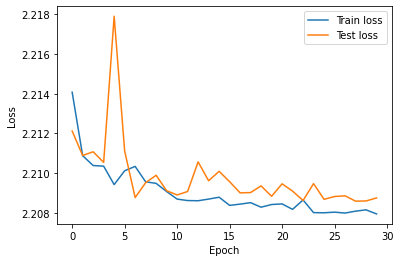

In [63]:
# loss

print('first epoch train-loss change :', seq_train_loss[-num_epoch:])
print('first epoch test-loss change :', seq_test_loss[-num_epoch:])

plt.plot(range(num_epoch), seq_train_loss[-num_epoch:], label="Train loss")
plt.plot(range(num_epoch), seq_test_loss[-num_epoch:], label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

first epoch train-accuracy change : [18.521145975443382, 18.35743519781719, 18.564802182810368, 18.177353342428376, 18.51568894952251, 18.62482946793997, 18.701227830832195, 18.16643929058663, 18.553888130968623, 18.27012278308322, 18.27012278308322, 18.63574351978172, 18.564802182810368, 18.4774897680764, 18.22100954979536, 18.548431105047747, 18.144611186903138, 18.74488403819918, 18.73942701227831, 18.379263301500682, 18.433833560709413, 18.750341064120054, 18.117326057298772, 18.89768076398363, 18.859481582537516, 18.155525238744882, 18.37380627557981, 18.248294679399727, 18.542974079126875, 18.37380627557981]
first epoch test-accuracy change : [18.411000763941942, 18.576521517697987, 18.576521517697987, 18.576521517697987, 18.576521517697987, 18.411000763941942, 18.411000763941942, 18.411000763941942, 18.576521517697987, 18.576521517697987, 18.411000763941942, 18.576521517697987, 18.576521517697987, 18.411000763941942, 18.576521517697987, 18.576521517697987, 18.576521517697987, 18

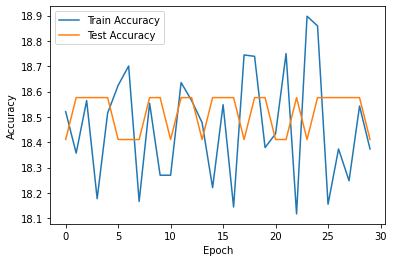

In [64]:
# accuracy

print('first epoch train-accuracy change :', seq_train_acc[-num_epoch:])
print('first epoch test-accuracy change :', seq_test_acc[-num_epoch:])

plt.plot(range(num_epoch), seq_train_acc[-num_epoch:], label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc[-num_epoch:], label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

## 8. 결론

모델을 다양한 형태로 바꿔어보았는데도 모델의 성능이 개선되지 않았다.
아마도 정말 데이터 분리를 잘못했거나 어디 다른 곳에 문제가 있는 것 같다.
다음 4가지의 이상한 점이 관찰된다.

1. train, test의 loss는 줄지만, train,test의 accuracy가 요동치면서 증가하는 경향성이 하나도 안보이는 것
2. 모델을 다양하게 바꾸어보아도 항상 test acc의 최댓값은 18.57 정도인것
3. test가 train보다 acc가 더 높은 구간이 많은 것
4. train, test의 acc가 주기를 가지는 곡선처럼 나타나는 것